In [52]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [72]:
from bing_image_downloader.downloader import download

query_string = 'dog'

download(query_string, limit=200,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=30,filter='photo', verbose=False)


[%] Downloading Images to e:\cos\project\unconditional GAN\autoencoder\dataset\dog
[!] Issue getting: https://www.recreoviral.com/wp-content/uploads/2015/08/Fotografías-de-perros-con-sus-cachorros-14.jpg
[!] Error:: 'ascii' codec can't encode character '\xed' in position 40: ordinal not in range(128)
[Error]Invalid image, not saving http://www.funnyalltime.com/wp-content/uploads/2012/08/The-great-funny-buildings.jpg

[!] Issue getting: http://www.funnyalltime.com/wp-content/uploads/2012/08/The-great-funny-buildings.jpg
[!] Error:: Invalid image, not saving http://www.funnyalltime.com/wp-content/uploads/2012/08/The-great-funny-buildings.jpg

[!] Issue getting: https://www.seattlehumane.org/wp-content/uploads/2018/10/shs-blog-features_0042_IMG_3950.jpg
[!] Error:: HTTP Error 403: Forbidden
[Error]Invalid image, not saving http://www.breedyourdog.com/uploads/listing_images/31363/87883/big_1569F636-2C84-4356-AC8F-E18C17152D81.jpeg

[!] Issue getting: http://www.breedyourdog.com/uploads/lis

KeyboardInterrupt: 

In [73]:
path = 'dataset/'

#Normalize images - divide by 255
train_datagen = ImageDataGenerator(rescale=1. / 255)

#Resize images, if needed
train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=340, 
                                          class_mode=None)

Found 93 images belonging to 1 classes.


In [97]:
"""
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train[i])
"""


'\nfor i in range(5):\n    plt.subplot(1, 5, i+1)\n    plt.imshow(train[i])\n'

In [74]:
# ทดสอบคำสั่งเก็บค่าแชนแนลของภาพ
imgForLab = (load_img('images/img.png'))
lab = rgb2lab(imgForLab)

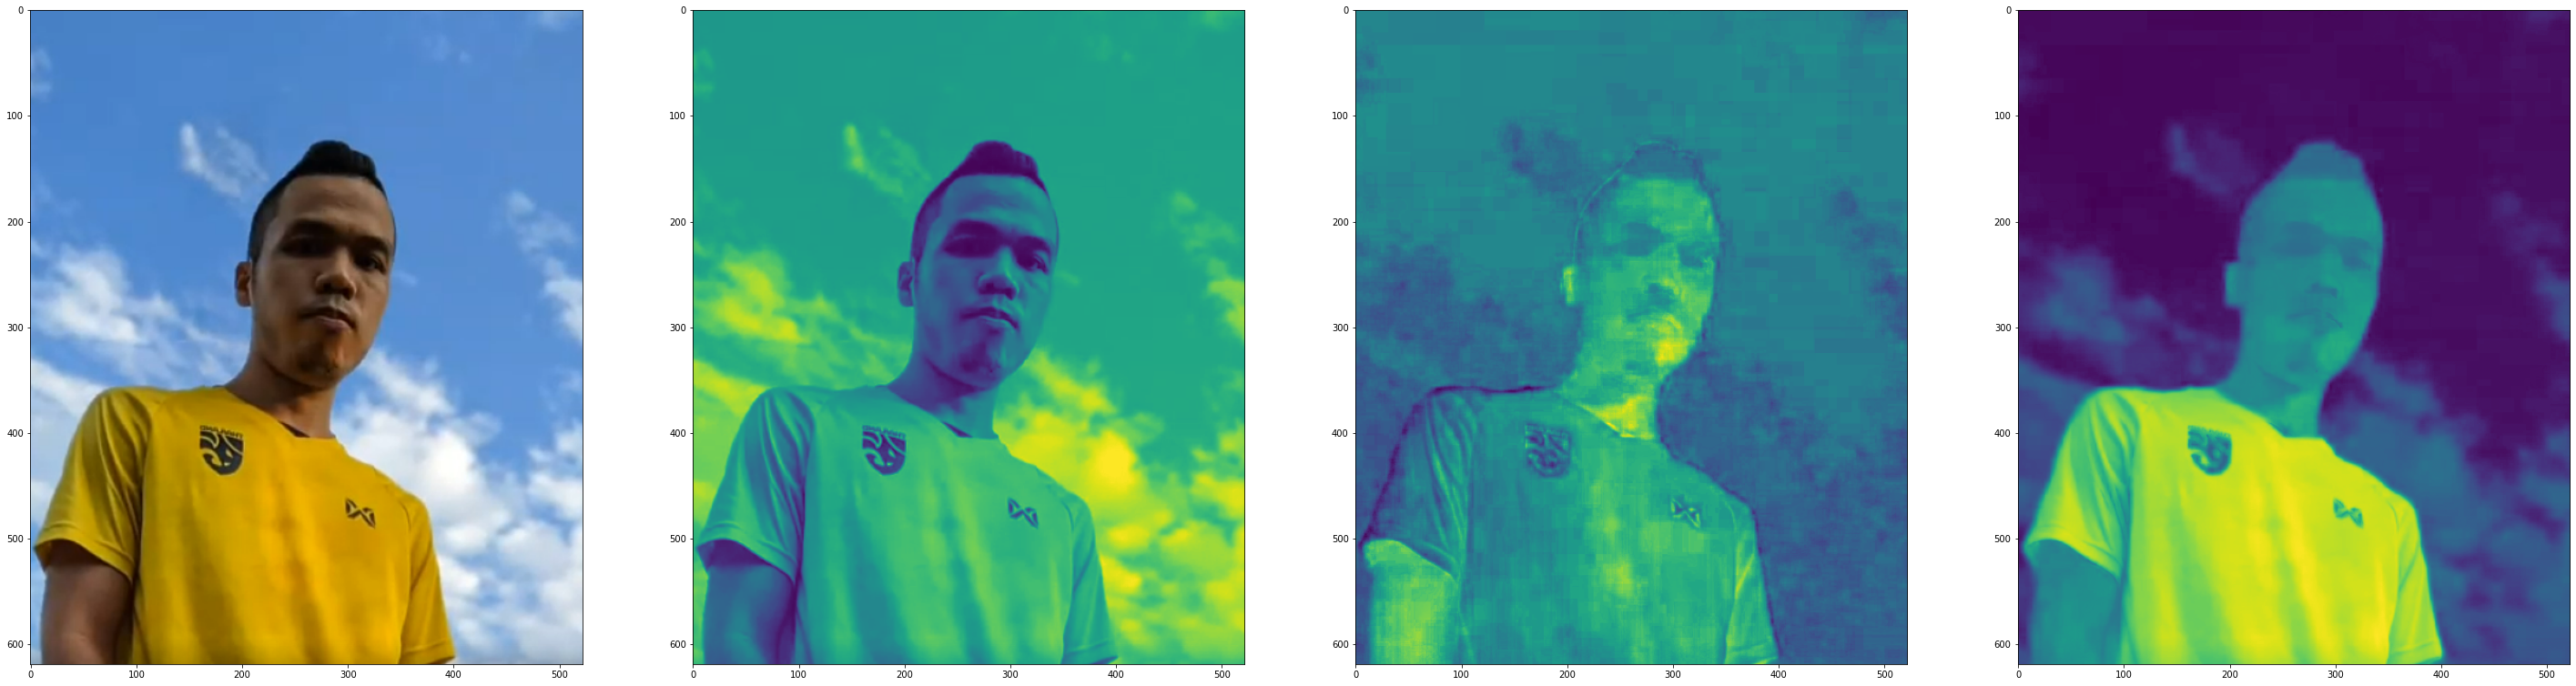

In [75]:
L=lab[:,:,0] # เก็บสว่าง
A=lab[:,:,1] # เก็บเฉดสีเขียว-แดง
B=lab[:,:,2] # เก็บเฉดสีฟ้า-เหลือง
plt.figure(figsize=(50,50))
plt.subplot(1, 4, 1)
plt.imshow(imgForLab)
plt.subplot(1, 4, 2)
plt.imshow(L)
plt.subplot(1, 4, 3)
plt.imshow(A)
plt.subplot(1, 4, 4)
plt.imshow(B)

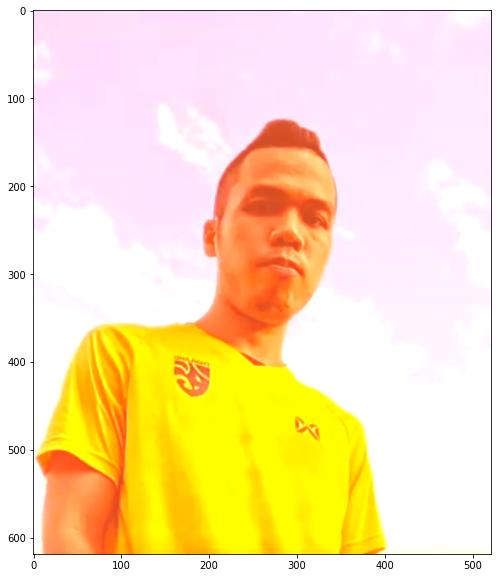

In [76]:
adjustColor = lab
adjustColor[:,:,0] = adjustColor[:,:,0] + 50
adjustColor[:,:,1] = adjustColor[:,:,1] + 50
adjustColor[:,:,2] = adjustColor[:,:,2] + 50
plt.figure(figsize=(10,10))
newImage = lab2rgb(adjustColor)
plt.imshow(newImage)

In [77]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128, 
      #so we divide the values by 128 to restrict values to between -1 and 1.
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)

(93, 256, 256, 1)
(93, 256, 256, 2)


In [78]:
#Encoder

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
#Decoder
#Note: For the last layer we use tanh instead of Relu. 
#This is because we are colorizing the image in this layer using 2 filters, A and B.
#A and B values range between -1 and 1 so tanh (or hyperbolic tangent) is used
#as it also has the range between -1 and 1. 
#Other functions go from 0 to 1.
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 512)      

In [79]:
model.fit(X,Y,validation_split=0.1, epochs=30, batch_size=16, verbose=0)

In [91]:
dataColorForPredict=[]
imageForPredict=img_to_array(load_img('images/dog2.png'))
imageForPredict = resize(imageForPredict ,(256,256))
dataColorForPredict.append(imageForPredict)

In [92]:
dataColorForPredict = np.array(dataColorForPredict, dtype=float)
dataColorForPredict = rgb2lab(1.0/255*dataColorForPredict)[:,:,:,0]
dataColorForPredict = dataColorForPredict.reshape(dataColorForPredict.shape+(1,))

In [93]:
output1 = model.predict(dataColorForPredict)
output1 = output1*128

1/1 [==============================] - 0s 34ms/step


In [94]:
result = np.zeros((256, 256, 3))
result[:,:,0] = dataColorForPredict[0][:,:,0]
result[:,:,1:] = output1[0]

In [95]:
imsave("images/result.png", lab2rgb(result))

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
